## Ankita Veerabahu - 200968266
## Lab-2 ex-1


#### 9. Use the “pima-indians-diabetes.csv” dataset and note down the meta information.

 The dataset shows various attributes for a person and whether the person tested positive or negative for diabetes. The attributes are: 
 
preg = Number of times pregnant

plas = Plasma glucose concentration a 2 hours in an oral glucose tolerance test

pres = Diastolic blood pressure (in mm Hg)

skin = Triceps skin fold thickness (in mm)

test = 2-Hour serum insulin (in mu U/ml)

mass = weight of person

pedi = Diabetes pedigree function

age = Age

class = Class variable (tested_positive if positive and tested_negative if negative)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("diabetes.csv")
df.head(10)

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive
5,5,116,74,0,0,25.6,0.201,30,tested_negative
6,3,78,50,32,88,31.0,0.248,26,tested_positive
7,10,115,0,0,0,35.3,0.134,29,tested_negative
8,2,197,70,45,543,30.5,0.158,53,tested_positive
9,8,125,96,0,0,0.0,0.232,54,tested_positive


In [3]:
df.shape

(768, 9)

In [4]:
df["class"] = df["class"].apply(lambda x: 1 if x == "tested_positive" else 0)
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# # Remove quotes from column names and rename columns
# df.columns = df.columns.str.replace("'")
# df = df.rename(columns={"class": "diabetes"})
# df.head()

In [6]:
df1=df[df['mass']==0]
df1

,preg,plas,pres,skin,insu,mass,pedi,age,class
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


Some entries have 0 mass, which is not helpful in classification. So we will drop those entries from the dataset.

In [7]:
df = df.drop(df1.index)
df

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [8]:
df["age-range"] = pd.cut(df["age"], range(0, 100, 10))
df["mass-range"] = pd.cut(df["mass"], range(0, 100, 10))
df.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class,age-range,mass-range
0,6,148,72,35,0,33.6,0.627,50,1,"(40, 50]","(30, 40]"
1,1,85,66,29,0,26.6,0.351,31,0,"(30, 40]","(20, 30]"
2,8,183,64,0,0,23.3,0.672,32,1,"(30, 40]","(20, 30]"
3,1,89,66,23,94,28.1,0.167,21,0,"(20, 30]","(20, 30]"
4,0,137,40,35,168,43.1,2.288,33,1,"(30, 40]","(40, 50]"


In [9]:
# a=df.loc[df['age-range'] == (20,30)]
df["age-range"].value_counts()

(20, 30]    408
(30, 40]    157
(40, 50]    113
(50, 60]     53
(60, 70]     24
(70, 80]      1
(80, 90]      1
(0, 10]       0
(10, 20]      0
Name: age-range, dtype: int64

### 10. Compute mean & standard deviation , tabulate and visualize the age of the patients.

In [10]:
df["age"].describe()

count    757.000000
mean      33.281374
std       11.697752
min       21.000000
25%       24.000000
50%       29.000000
75%       41.000000
max       81.000000
Name: age, dtype: float64

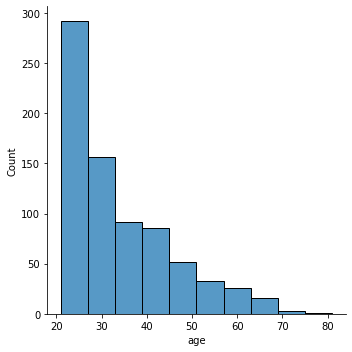

In [11]:
sns.displot(x = df['age'], bins = 10)
plt.show()

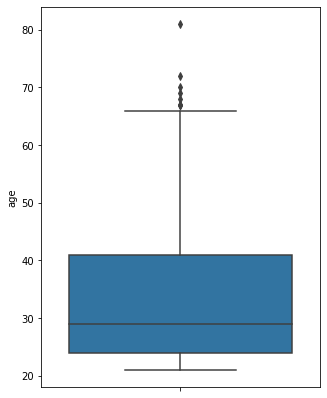

In [12]:
plt.figure(figsize=(5,7))
sns.boxplot(data=df,y='age')
plt.show()

### 11. Analyze and tabulate the relationship of age, BMI of patients with respect to the class

In [14]:
pd.crosstab(df["age-range"], df["class"])

class,0,1
age-range,,
"(20, 30]",319,89
"(30, 40]",81,76
"(40, 50]",49,64
"(50, 60]",23,30
"(60, 70]",17,7
"(70, 80]",1,0
"(80, 90]",1,0


We can see that people with an age range of 50-60 are most often diagnosed with diabetes

In [15]:
pd.crosstab(df["mass-range"], df["class"])

class,0,1
mass-range,,
"(10, 20]",14,0
"(20, 30]",227,51
"(30, 40]",208,161
"(40, 50]",40,48
"(50, 60]",2,5
"(60, 70]",0,1


We can see that people with a mass range of 60-70 are most often diagnosed with diabetes 

#### 12. Tabulate the class label and comment on whether the classes are balanced.

In [16]:
count= df['class'].value_counts()
count

0    491
1    266
Name: class, dtype: int64

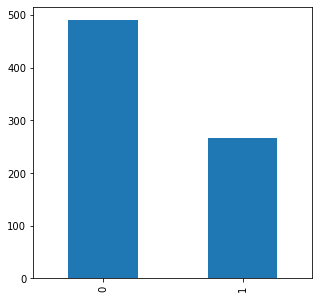

In [17]:
plt.figure(figsize=(5,5))
count.plot.bar()
plt.show()

####  13. Use the data set to build a logistic regression model (using sklearn) and predict the class label. Divide the dataset into training and test set (70,30) using train_test_split method in sklearn.

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(["mass-range", "age-range", "class"], axis=1), df["class"],random_state=42, test_size=0.30)
model = LogisticRegression(max_iter=1000).fit(X_train, y_train)
model

LogisticRegression(max_iter=1000)

#### 14. Use the test data set and evaluate the performance using a confusion matrix. Visualize the confusion matrix using a heat map

In [40]:
from sklearn.metrics import confusion_matrix

In [33]:
y_preds = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_preds)
conf_mat

array([[128,  17],
       [ 35,  48]], dtype=int64)

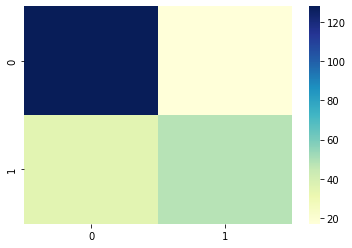

In [34]:
hp= sns.heatmap(conf_mat,cmap="YlGnBu")

#### 15. Compute accuracy rate, true positive and true negative rate and comment on the performance.

In [35]:
accuracy = round((conf_mat[0][0] + conf_mat[1][1])/(conf_mat[0][0] + conf_mat[1][1] + conf_mat[0][1] + conf_mat[1][0]), 3)
accuracy

0.772

The classifier has an accuracy of 0.772 which is a fairly decent classifying performance. 

In [36]:
true_pos = round(conf_mat[0][0]/(conf_mat[0][0] + conf_mat[0][1]), 3)
true_pos

0.883

The true positive rate is 0.883 which indicates that the classifier is good at predicting correctly when patients will be
diagnosed positively with diabetes.

In [37]:
true_neg = round(conf_mat[1][1]/(conf_mat[1][0] + conf_mat[1][1]), 3)
true_neg

0.578

The true negative rate is 0.578 which indicates that the classifier is not very good at predicting when patients will be
 diagnosed negatively with diabetes.

#### 16. Visualize the ROC curve, and comment on the performance of the classifier.

In [38]:
from sklearn import metrics

C:\Users\R VEERABAHU\anaconda3\envs\tensorflow_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


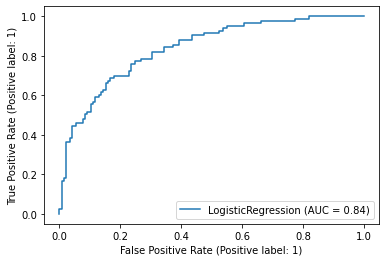

In [39]:
metrics.plot_roc_curve(model, X_test, y_test) 

The AUC is 0.84 which means the model's performance is good as the model is gets better as AUC tends to 1.

An AUC of 0.84 indicates that it has a high area under the curve and is good at correctly classifying
observations into categories.